# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [31]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [32]:
df.shape

(37638, 5)

In [33]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [34]:
ny_df = df[df['state']=='New York']

In [35]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [36]:
ny_df.shape

(684, 5)

In [37]:
ny_df.tail()

,date,state,fips,cases,deaths
37392,2022-01-09,New York,36,4136861,60083
37448,2022-01-10,New York,36,4194745,60162
37504,2022-01-11,New York,36,4244155,60428
37560,2022-01-12,New York,36,4299066,60638
37616,2022-01-13,New York,36,4361115,60876


In [38]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [39]:
#total number of cases
ny_df['cases'].max()

4361115

In [40]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

953601238

Finding new covid 19 cases on daily basis (new cases added everyday)

In [41]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [42]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [44]:
ny_df.tail(10)

,date,state,fips,cases,deaths,new_cases
37112,2022-01-04,New York,36,3729331,59339,51289
37168,2022-01-05,New York,36,3804480,59485,75149
37224,2022-01-06,New York,36,3884858,59631,80378
37280,2022-01-07,New York,36,3966952,59827,82094
37336,2022-01-08,New York,36,4057084,59913,90132
37392,2022-01-09,New York,36,4136861,60083,79777
37448,2022-01-10,New York,36,4194745,60162,57884
37504,2022-01-11,New York,36,4244155,60428,49410
37560,2022-01-12,New York,36,4299066,60638,54911
37616,2022-01-13,New York,36,4361115,60876,62049


In [45]:
ny_df['new_cases'].sum()

4361115

In [46]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [47]:
type(ny_new_cases)

pandas.core.series.Series

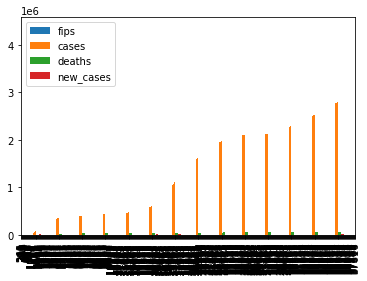

In [48]:
ny_df.plot(kind='bar')

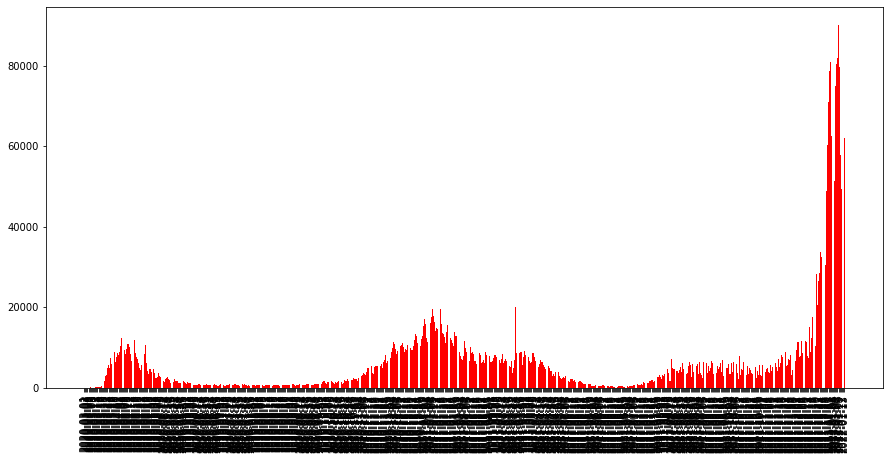

In [49]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [50]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [51]:
# ny_dates_30

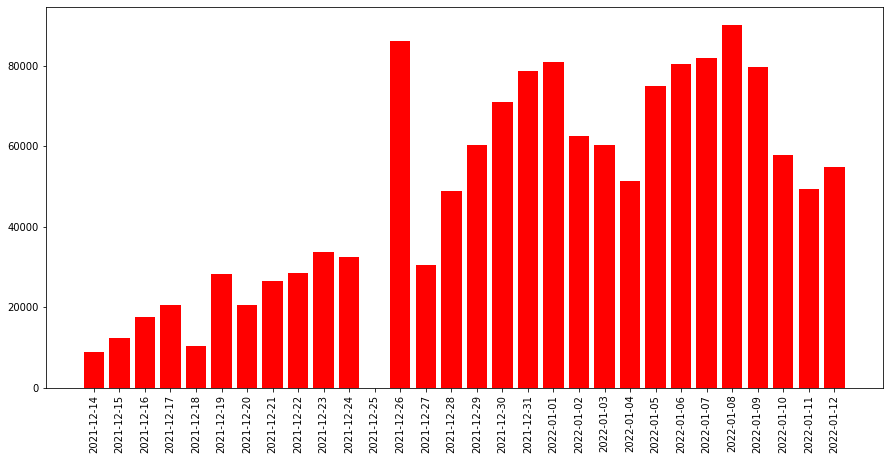

In [52]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

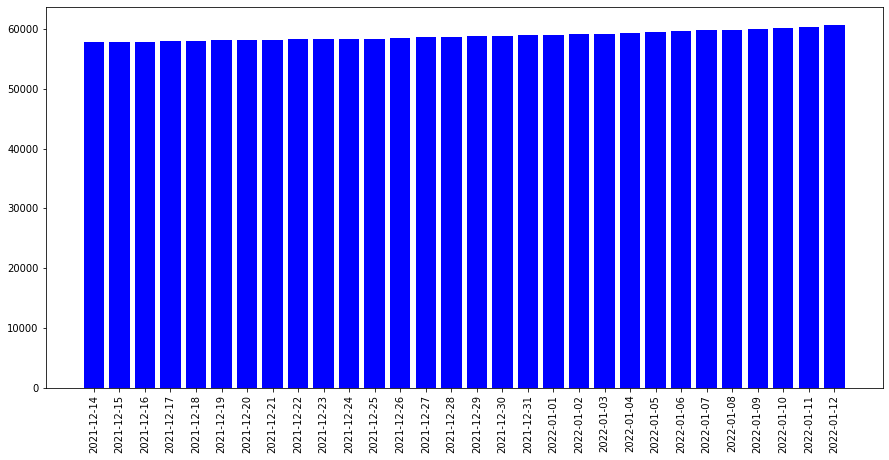

In [53]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [54]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

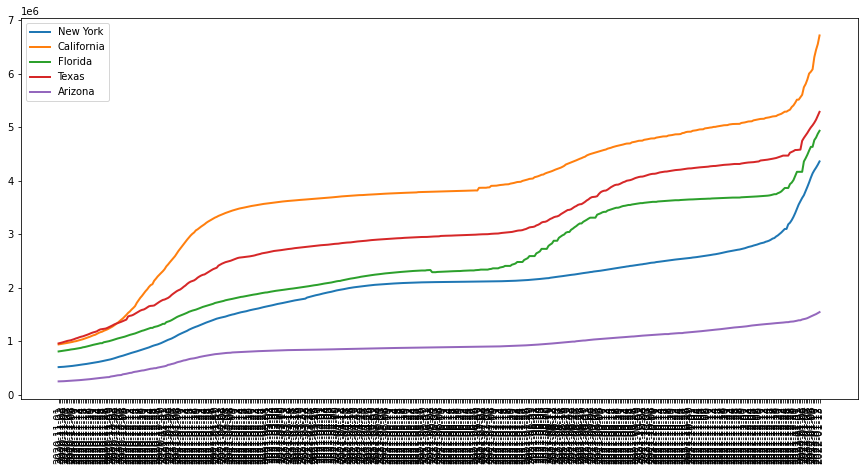

In [55]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


# Conclusion

Below are the conclusions:

New Cases for Covid were increasing steadily for the first 24 days with some fluctuations since the population decreases from below 20 thousand and above 30 thousand and then dramatically increases after Christmas reaching a speak of above 80 thousand cases. After reaching this level of new cases, new cases fluctuated wildly reaching lows of 30 thousand cases and having another day January 9, 2022, where new cases reach  80 thousand once more. Once it reaches this new milestone of eighty thousand cases, we see a downward trend of new cases with some variations that seems to have stabilize in the last few days.  
Since the number of new cases increase dramatically after the Holidays, we can conclude that increase live interaction between family members and friends, combine with the inflection rate of the Omicron variant led to this dramatic increase. 

Additionally, we can also conclude that the stabilization of new covid cases can be the result of people in the city becoming more aware of the new variant and as a result taking more action to better protect themselves and their communities. This stabilization is also the result of new policies that mandate that private employers should have all their employees to immunize and that encourages different age group in the general population

     
